In [3]:
%%capture
!pip install -r requirements.txt

In [4]:
%%capture
from read import *
from document_processor import *
from cluster import *
from sklearn.decomposition import PCA
from visualizer import *
from guess_class import *
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [29]:
class TextMining:
    def __init__ (self):
        self.df = pd.read_csv('word_matrix.csv',index_col = 0)
        self.predicted_label = None
        self.modified_predicted = None
    '''
    def process (self):
        Preprocessor = Folder_Reader() 
        self.df = Preprocessor.read_folder()   
        self.df.to_csv('word_matrix.csv')
    '''

    def cluster (self):
        #self.process()

        pca = PCA(n_components=10)
        reduced_data = pd.DataFrame(pca.fit_transform(self.df))

        clusterer = Cluster (reduced_data)
        self.predicted_label, centroids = clusterer.Kmeans(K=3, maxiter=100, similarity = 'cosine')
        
        return self.predicted_label, centroids
    
    def visualize (self, actual_label):
        self.cluster()
        self.modified_predicted = majority_class (self.predicted_label, actual_label)
        
        print('Predicted',self.modified_predicted)
        print('Actual',actual_label)
        
        visualizer = Visualizer(self.df,self.modified_predicted, actual_label)
        visualizer.plot()

    def evaluate (self, actual_label):
        prec = precision_score(y_true=actual_label, y_pred=self.modified_predicted, average="micro",
                                         zero_division=0)
        print('Precision score:', prec)
        rec = recall_score(y_true=actual_label, y_pred=self.modified_predicted, average="micro")
        print('Recall score:', rec)
        f1 = f1_score(y_true=actual_label, y_pred=self.modified_predicted, average="micro")
        print('F1 score:', f1)

        conf_matrix = confusion_matrix(y_true=actual_label,y_pred=self.modified_predicted)
        print('Confusion matrix')
        print(pd.DataFrame(conf_matrix))

Predicted [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2]
Actual [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2]


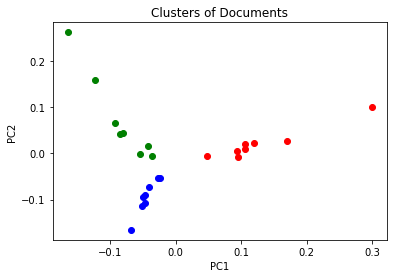

Precision score: 1.0
Recall score: 1.0
F1 score: 1.0
Confusion matrix
   0  1  2
0  8  0  0
1  0  8  0
2  0  0  8


In [32]:
#from textmining import *

model = TextMining()
actual_labels = [0]*8 + [1]*8 + [2]*8
model.visualize(actual_labels)
model.evaluate(actual_labels)